In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/Users/sebastiandodt/Downloads/HouseType.csv')

In [54]:
df.head(6)

,GEO_ID,TOTAL_UNITS,ONE_DETACH,ONE_ATTACH,TWO_UNITS,THREE_OR_FOUR,FIVE_TO_NINE,TEN_TO_19,20_TO_49,50_OR_MORE
0,1500000US110010001011,844,0,226,0,66,0,0,97,455
1,1500000US110010001021,964,95,432,138,142,27,23,61,46
2,1500000US110010001022,496,80,321,37,0,5,11,28,14
3,1500000US110010001023,533,76,203,12,9,49,0,31,153
4,1500000US110010002011,0,0,0,0,0,0,0,0,0
5,1500000US110010002012,0,0,0,0,0,0,0,0,0


In [55]:
len(df)

571

In [56]:
median_n_units = []
for i in df['GEO_ID']:
    units = []
    columns = df.columns[2:]
    for c in columns:
        add = [c] * int(df.loc[df['GEO_ID']==i,c])
        if len(add) > 0:
            units += add
    if len(units) == 0:
        median_n_units.append("No data")
    else:
        median_index = len(units)//2
        median_n_units.append(units[median_index])    
df['median_n_units'] = median_n_units

median_n_numeric = []
for i in range(len(df)):
    if df.loc[i,'median_n_units']=="No data":
        median_n_numeric.append(0)
    elif df.loc[i,'median_n_units']=="ONE_DETACH":
        median_n_numeric.append(1)
    elif df.loc[i,'median_n_units']=="ONE_ATTACH":
        median_n_numeric.append(1.5)
    elif df.loc[i,'median_n_units']=="TWO_UNITS":
        median_n_numeric.append(2)
    elif df.loc[i,'median_n_units']=="THREE_OR_FOUR":
        median_n_numeric.append(3)
    elif df.loc[i,'median_n_units']=="FIVE_TO_NINE":
        median_n_numeric.append(4)
    elif df.loc[i,'median_n_units']=="TEN_TO_19":
        median_n_numeric.append(5)
    elif df.loc[i,'median_n_units']=="20_TO_49":
        median_n_numeric.append(6)
    elif df.loc[i,'median_n_units']=="50_OR_MORE":
        median_n_numeric.append(7)
    else:
        print("something weird is going on...")

df['median_n_numeric'] =median_n_numeric
df.to_csv('/Users/sebastiandodt/Downloads/HouseType_with_median.csv')

In [2]:
bookings = pd.read_excel('/Users/sebastiandodt/OneDrive/Eslanz/bookings.xlsx')

In [9]:
bookings['Dauer'] = bookings.loc[bookings['Buchung storniert']==False,'Abflug'] - bookings.loc[bookings['Buchung storniert']==False,'Ankunft']

In [13]:
bookings['Tage'] = bookings['Dauer'].dt.days

In [18]:
bookings_this_year = bookings.loc[bookings['Ankunft'] >= '2022-01-01',:]

<AxesSubplot: xlabel='Tage', ylabel='Count'>

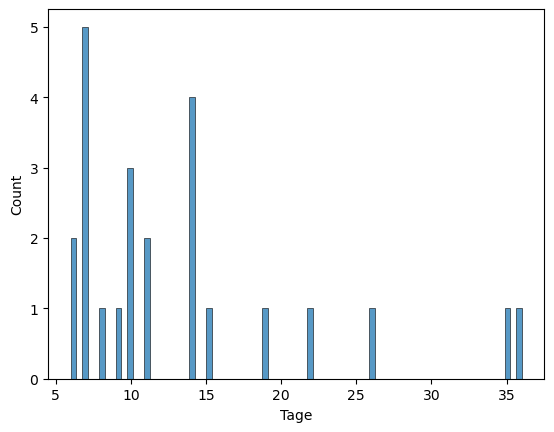

In [32]:
sns.histplot(bookings_this_year, x='Tage', bins=80)
# plt.axvline(7,c='black',linestyle='--')

In [27]:
bookings_this_year['Tage'].value_counts().reset_index().sort_values('index')

,index,Tage
3,6.0,2
0,7.0,5
10,8.0,1
9,9.0,1
2,10.0,3
4,11.0,2
1,14.0,4
5,15.0,1
12,19.0,1
11,22.0,1
